<a href="https://colab.research.google.com/github/AarthiAlagesan/TrafficAccident/blob/main/traffic_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Index      Country Code  Year  Deaths  Sidedness
0      0  Afghanistan  AFG  1990    4154          0
1      1  Afghanistan  AFG  1991    4472          0
2      2  Afghanistan  AFG  1992    5106          0
3      3  Afghanistan  AFG  1993    5681          0
4      4  Afghanistan  AFG  1994    6001          0


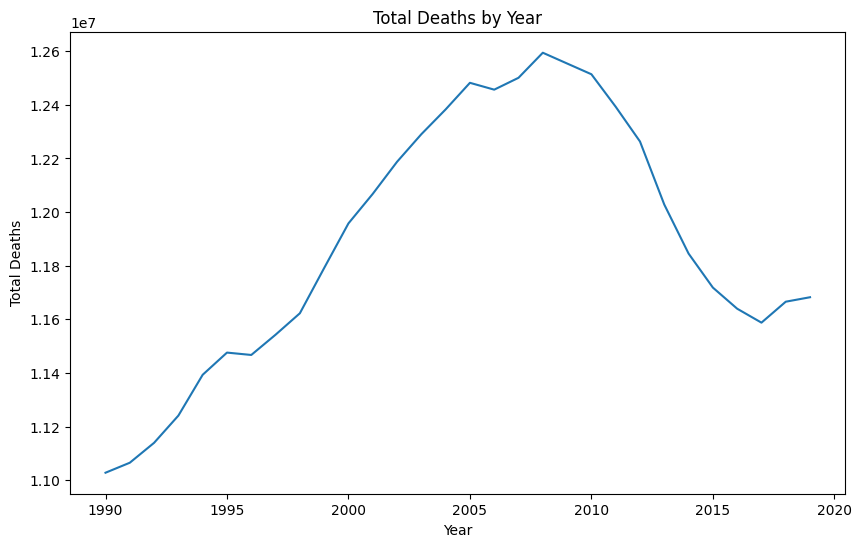

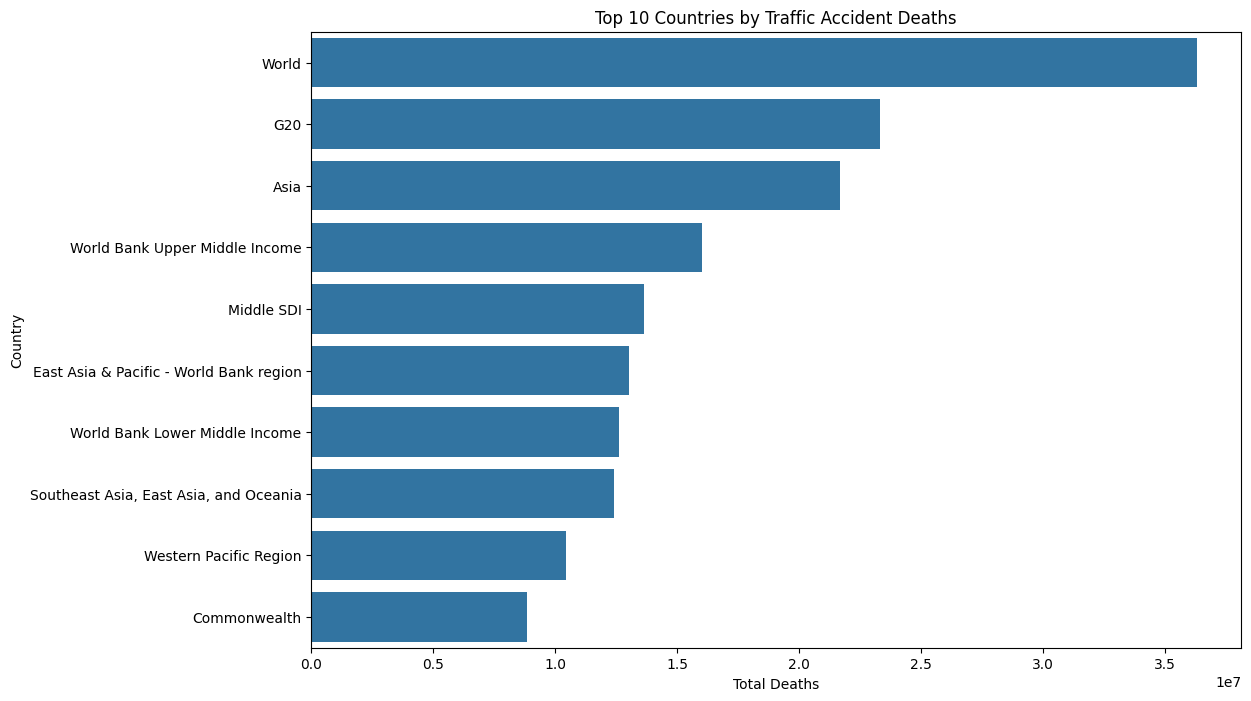

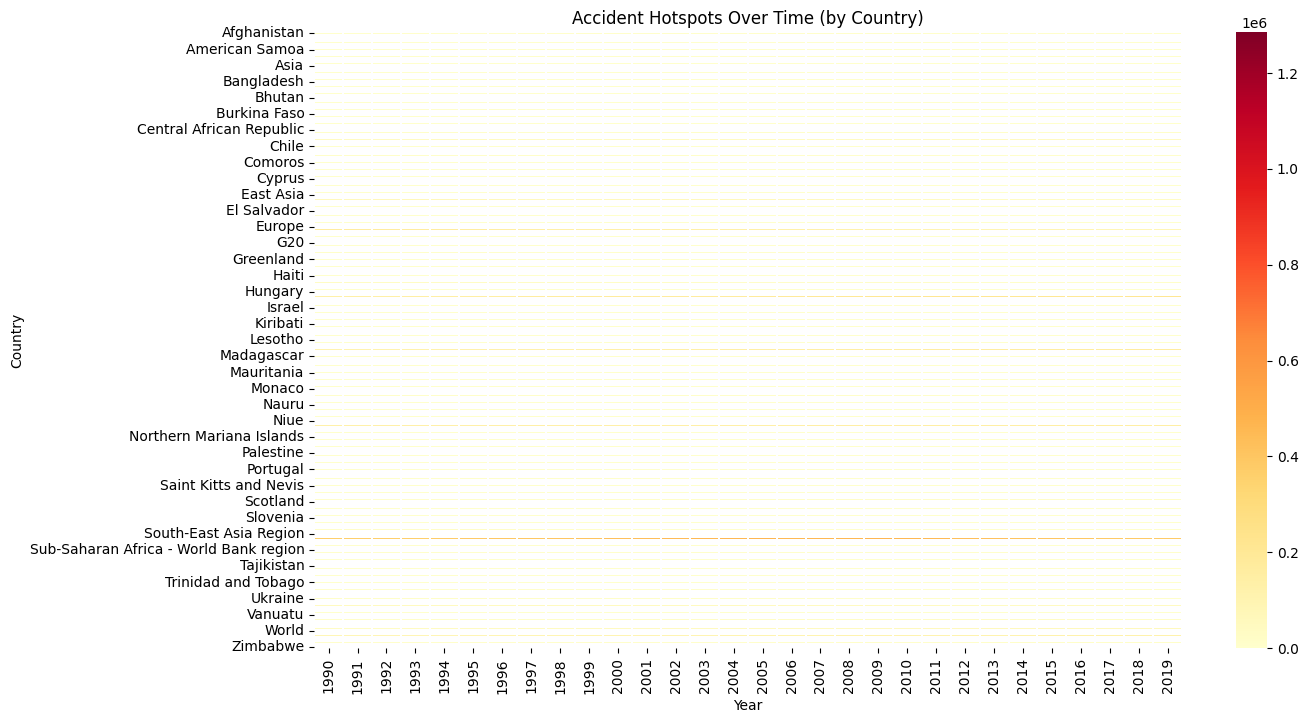

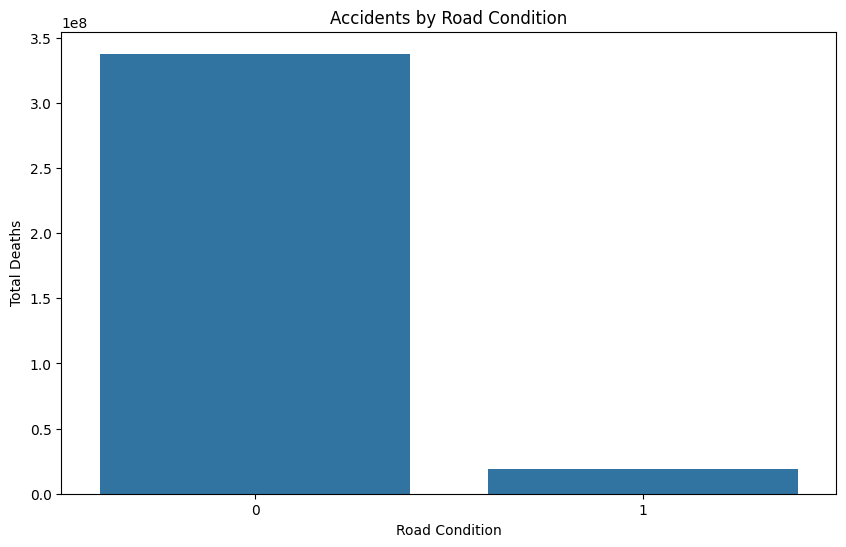

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/road_accident.csv')

# Inspect data
print(data.head())

# Standardize column names to lowercase and remove whitespace
data.columns = data.columns.str.strip().str.lower()

# Rename columns if needed (in this case, slideness -> sidedness)
data.rename(columns={'sidedness': 'road_condition'}, inplace=True)

# Step 1: Analyze Patterns (accidents over time, by country or code, etc.)
# Group data by 'year' to analyze trends over time
yearly_accidents = data.groupby('year').agg({'deaths': 'sum'}).reset_index()

# Group data by 'country' to identify accident distribution by country
country_accidents = data.groupby('country').agg({'deaths': 'sum'}).sort_values(by='deaths', ascending=False).reset_index()

# Step 2: Visualize Patterns

# 2.1 Accidents Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_accidents, x='year', y='deaths')
plt.title('Total Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.show()

# 2.2 Accidents by Country
plt.figure(figsize=(12, 8))
sns.barplot(data=country_accidents.head(10), x='deaths', y='country')
plt.title('Top 10 Countries by Traffic Accident Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()

# Step 3: Visualize Hotspots based on 'year' and 'country'
# Creating a pivot table to visualize accident hotspots by 'country' and 'year' with 'deaths' as values
pivot_table = data.pivot_table(values='deaths', index='country', columns='year', aggfunc='sum')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', linecolor='white', linewidth=0.1)
plt.title('Accident Hotspots Over Time (by Country)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

# Step 4: Analyze and visualize road conditions (road_condition)
road_condition_accidents = data.groupby('road_condition').agg({'deaths': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=road_condition_accidents, x='road_condition', y='deaths')
plt.title('Accidents by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Total Deaths')
plt.show()
